In the last section I attempted to turn this machine learning problem into more of a classification based model. In doing so I found reasonable success achieving an accuracy of classification of 53.6% (identifying both upward and downward price movement) and a recall score of 66% which quantifies how often a positive sample is correctly identified (upward price movement). This is close to my previously selected Minimum Viable Product, however when it comes to trading and profits, the real story at the end of the day is going to be how much profit there really is. In speaking with a mentor they mentioned backtesting my model, so in this section that is what im going to explore.

In [1]:
from datetime import datetime

import backtrader as bt

In [15]:
class SMACross(bt.SignalStrategy):
    def __init__(self):
        sma7 = bt.ind.SMA(period=7)
        sma50 = bt.ind.SMA(period=50)
        sma200 = bt.ind.SMA(period=200)
        
        price = self.data
       
        self.crossover_p_50 = bt.ind.CrossOver(price, sma50)
        
        
    def next(self):
        if not self.position:
            if self.crossover_p_50 > 0:
                self.buy()
        elif self.crossover_p_50 < 0:
            self.close()
        


In [3]:
#!pip install matplotlib==3.2.2
from matplotlib import warnings
from matplotlib.dates import (HOURS_PER_DAY, MIN_PER_HOUR, SEC_PER_MIN,
MONTHS_PER_YEAR, DAYS_PER_WEEK,
SEC_PER_HOUR, SEC_PER_DAY,
num2date, rrulewrapper, YearLocator,
MicrosecondLocator)
import matplotlib.pyplot as plt



<IPython.core.display.Javascript object>


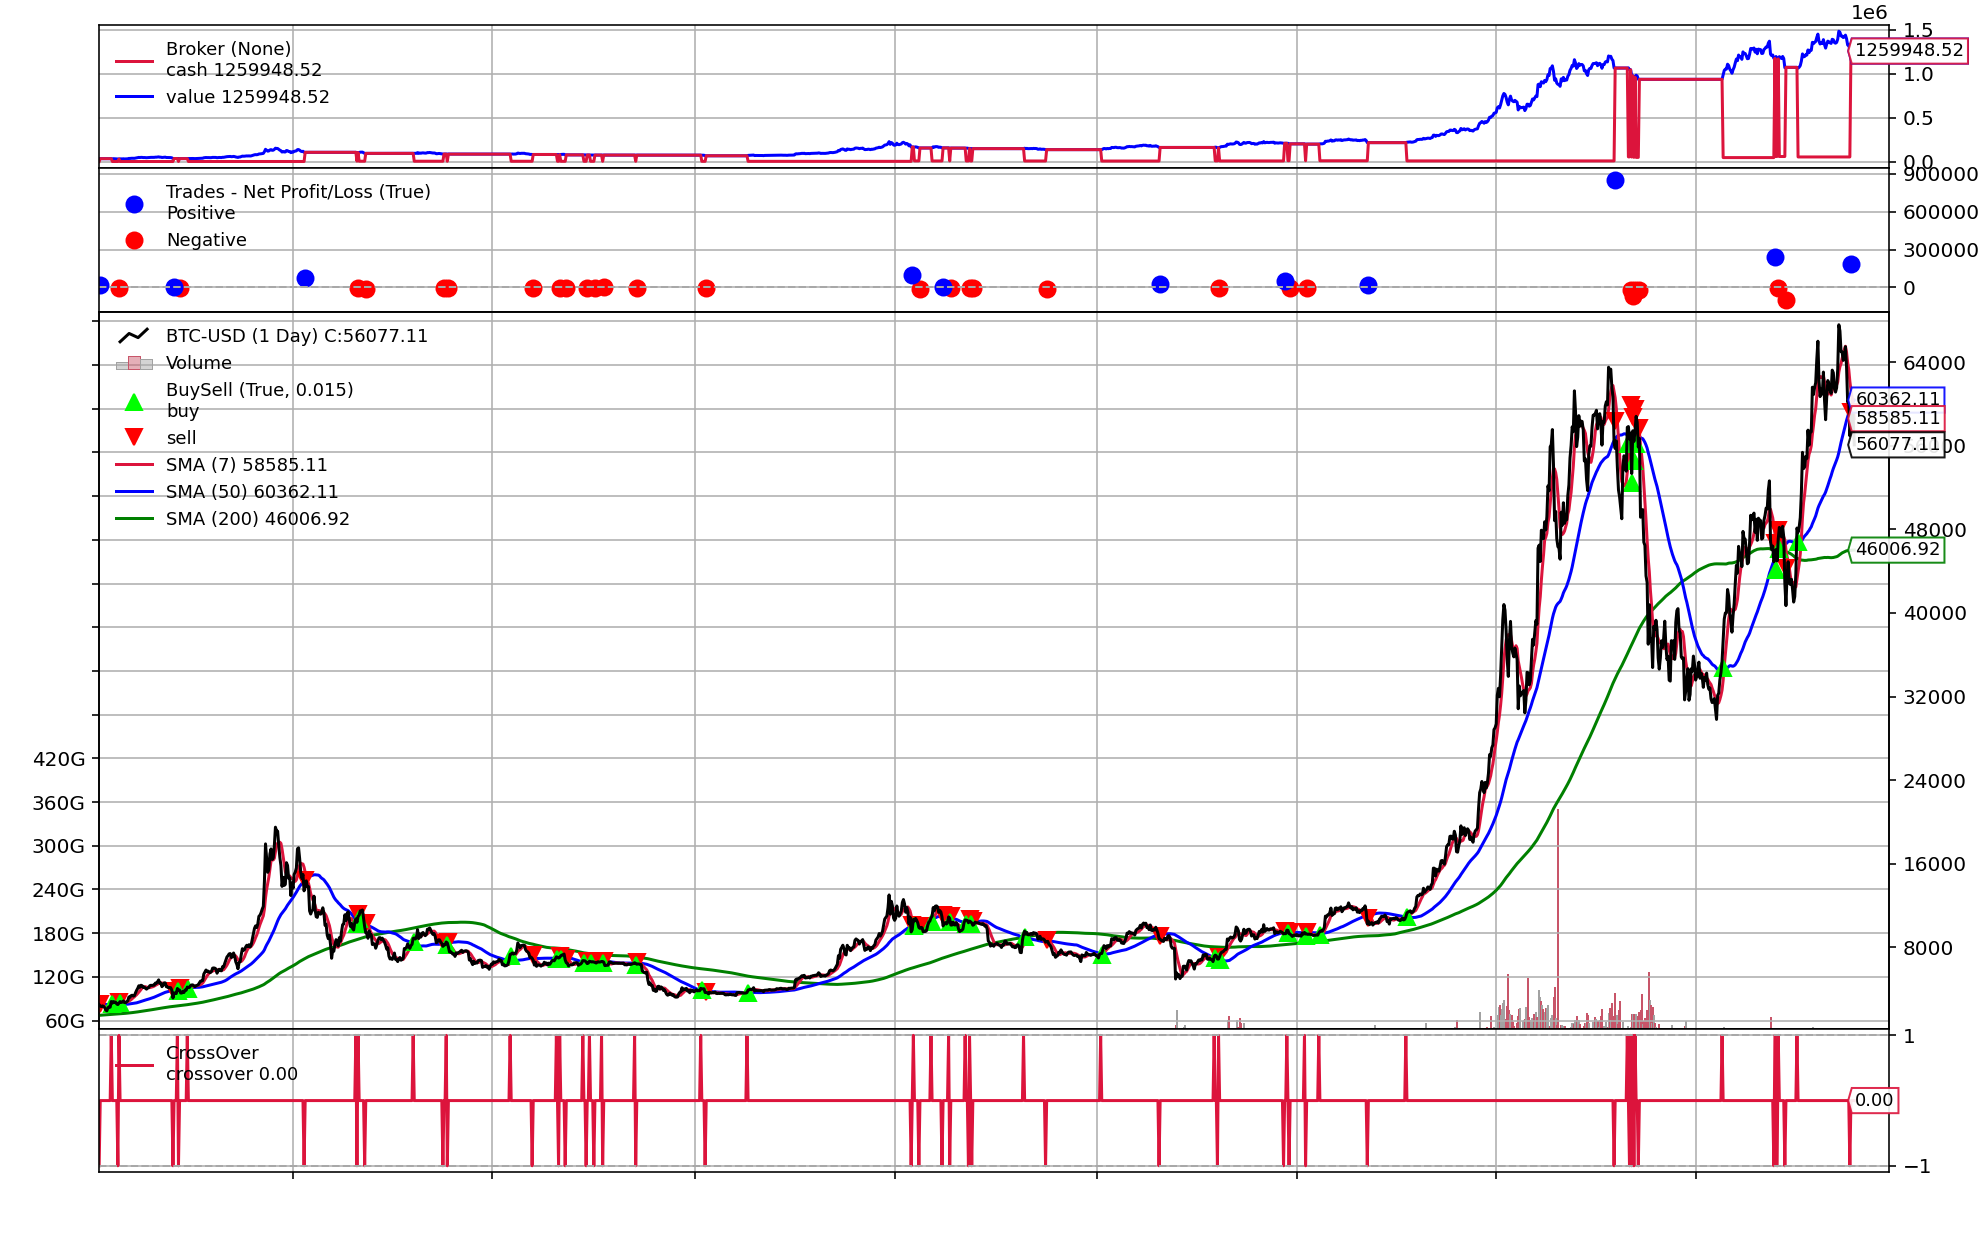

[[<Figure size 432x288 with 5 Axes>]]

In [16]:
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross)

data = bt.feeds.YahooFinanceCSVData(dataname="./data/BTC-USD.csv")
cerebro.adddata(data)
cerebro.broker.setcash(5000)
cerebro.addsizer(bt.sizers.PercentSizer, percents=95)

cerebro.run()
cerebro.plot()



After some experimentation, I have decided not to pursue further the use of BackTrader library as I feel it does not currently represent my goals of this project in relation to machine learning. While I would enjoy using this model in the future, and it appears to be quite effective, I am not really doing anything myself, and any indicators used are pre-existing. I am going to go back to my initial approach and try to improve results from there.